In [1]:
import pandas as pd
import numpy as np
import json
import os

In [2]:
IMG_ROOT = '/opt/ml/input/data/mergeset'
with open(os.path.join(IMG_ROOT, 'ufo/train_new.json'),'r') as f:
    merge_set = json.load(f)
print(len(merge_set['images']))

1811


In [3]:
image_set = merge_set['images']

df_keys = []
df_values = []

for k,v in image_set.items():
    df_keys.append(k)
    # transpose data for mapping image name
    df_values.append(pd.DataFrame(v['words']).T)
    
df = pd.concat(df_values, keys=df_keys)
print(f'len(df_keys) : {len(df_keys)}\t len(df_values) : {len(df_values)}')
df

len(df_keys) : 1811	 len(df_values) : 1811


points  \
img_4380.jpg  0   [[662.0, 747.0], [945.0, 759.0], [922.0, 1582....   
              1   [[476.0, 551.0], [1132.0, 554.0], [1118.0, 747...   
              2   [[455.0, 293.0], [1144.0, 310.0], [1129.0, 518...   
img_4583.jpg  0   [[323.0, 912.0], [1747.0, 943.0], [1747.0, 114...   
              1   [[318.0, 620.0], [1754.0, 664.0], [1752.0, 876...   
...                                                             ...   
IMG_5464.jpeg 33  [[951.0, 3419.25], [1051, 3419.25], [1051, 350...   
              34  [[1088.5, 3419.25], [1098.5, 3419.25], [1098.5...   
              35  [[938.5, 3424.25], [951.0, 3424.25], [951.0, 3...   
              36  [[618.0, 3132.33], [661.33, 3132.33], [661.33,...   
              37  [[554.67, 3132.33], [594.67, 3132.33], [594.67...   

                  transcription  language illegibility orientation word_tags  
img_4380.jpg  0            출입금지      [ko]        False  Horizontal      None  
              1            오토바이      [ko]        False  Horizontal      None  
              2             자전거      [ko]        False  Horizontal      None  
img_4583.jpg  0   010-9075-2192      [en]        False  Horizontal      None  
              1          주말관광문의      [ko]        False  Horizontal      None  
...                         ...       ...          ...         ...       ...  
IMG_5464.jpeg 33            425  [Others]        False  Horizontal      None  
              34              )  [Others]        False  Horizontal      None  
              35              (  [Others]        False  Horizontal      None  
              36              D      [EN]        False  Horizontal      None  
              37              U  [Others]        False  Horizontal      None  

[26341 rows x 6 columns]

In [4]:
df.index[:5]

MultiIndex([('img_4380.jpg', '0'),
            ('img_4380.jpg', '1'),
            ('img_4380.jpg', '2'),
            ('img_4583.jpg', '0'),
            ('img_4583.jpg', '1')],
           )

In [5]:
#divide index
df['image_name'] = df.index.get_level_values(0)
df['point_name'] = df.index.get_level_values(1).astype(int)
#change index
df.index = (i for i in range(len(df)))
a= set(df['image_name'].values)
df = df.loc[df.illegibility == False]
b= set(df.image_name.values)
print(a-b)
df.head()

{'IMG_5405.JPG'}


,points,transcription,language,illegibility,orientation,word_tags,image_name,point_name
0,"[[662.0, 747.0], [945.0, 759.0], [922.0, 1582....",출입금지,[ko],False,Horizontal,None,img_4380.jpg,0
1,"[[476.0, 551.0], [1132.0, 554.0], [1118.0, 747...",오토바이,[ko],False,Horizontal,None,img_4380.jpg,1
2,"[[455.0, 293.0], [1144.0, 310.0], [1129.0, 518...",자전거,[ko],False,Horizontal,None,img_4380.jpg,2
3,"[[323.0, 912.0], [1747.0, 943.0], [1747.0, 114...",010-9075-2192,[en],False,Horizontal,None,img_4583.jpg,0
4,"[[318.0, 620.0], [1754.0, 664.0], [1752.0, 876...",주말관광문의,[ko],False,Horizontal,None,img_4583.jpg,1


In [6]:
image_set['IMG_5405.JPG']['words']

{'0': {'points': [[356.67, 1256.67],
   [776.67, 1223.33],
   [813.33, 1406.67],
   [383.33, 1440.0]],
  'orientation': None,
  'transcription': None,
  'word_tags': None,
  'language': None,
  'illegibility': True},
 '1': {'points': [[150.0, 1136.67],
   [303.33, 1136.67],
   [303.33, 1263.33],
   [150.0, 1263.33]],
  'orientation': None,
  'transcription': None,
  'word_tags': None,
  'language': None,
  'illegibility': True}}

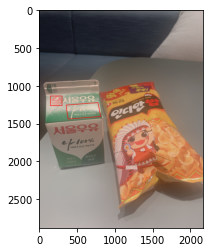

In [7]:
import cv2
import matplotlib.pyplot as plt
# illegibility == False 만 가져오면서 누락된 데이터 확인
image = cv2.imread(os.path.join(IMG_ROOT, 'images/IMG_5405.JPG'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#get annotations
anno_lists = []
for k,v in image_set['IMG_5405.JPG']['words'].items():
    anno_lists.append(np.array(v['points'], dtype=np.int32))

image = cv2.polylines(image, anno_lists, True, (255,0,0), 5)
    
plt.imshow(image)

In [8]:
df['num_boxes'] = df['points'].apply(lambda x : int(len(x)/2 -1)) # n/2 -1
df.describe()

/tmp/ipykernel_48286/1004482986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_boxes'] = df['points'].apply(lambda x : int(len(x)/2 -1)) # n/2 -1


,point_name,num_boxes
count,24602.000000,24602.000000
mean,22.083733,1.036786
std,30.780015,0.318508
min,0.000000,1.000000
25%,3.000000,1.000000
50%,11.000000,1.000000
75%,28.000000,1.000000
max,256.000000,12.000000


In [9]:
new_df = df['num_boxes'].groupby(df['image_name'])
# https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html
new_df.describe()
box_images_list = []
box_nums_list = []
for k,v in sorted(new_df.sum().items(), key=lambda x:x[1]):
    box_images_list.append(k)
    box_nums_list.append(v)
print(len(box_images_list))
print(len(box_nums_list))

1810
1810


mean : 14.092265193370165 std: 21.162742092648315


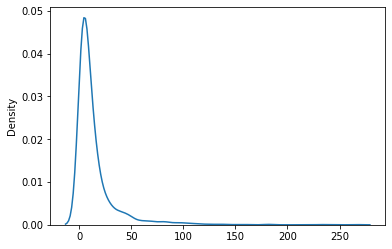

In [10]:
import seaborn as sns

sns.kdeplot(box_nums_list)
print(f'mean : {sum(box_nums_list)/len(box_nums_list)} std: {np.array(box_nums_list).std()}')

In [11]:
from sklearn.model_selection import StratifiedKFold

box_nums_list = np.array(box_nums_list)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(box_images_list, box_nums_list)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [12]:
train_list = []
test_list = []
#index 값을 내뱉는 것인다.
for train_idx, test_idx in skf.split(box_images_list, np.array(box_nums_list)):
    print(f'TRAIN : {len(train_idx)}\t TEST : {len(test_idx)}')
    train_list.append(box_nums_list[train_idx])
    test_list.append(box_nums_list[test_idx])

TRAIN : 1448	 TEST : 362
TRAIN : 1448	 TEST : 362
TRAIN : 1448	 TEST : 362
TRAIN : 1448	 TEST : 362
TRAIN : 1448	 TEST : 362


/opt/conda/envs/ocr/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [13]:
import copy
from tqdm import tqdm
box_images_list = np.array(box_images_list)
valid_set_index = [test_idx for _, test_idx in skf.split(box_images_list, box_nums_list)]

for i, indexes in tqdm(enumerate(valid_set_index)):
    valid_image_list = box_images_list[indexes]
    
    temp_image_set = copy.deepcopy(merge_set)
    valid_json_dict = dict(images={})
    
    for image in valid_image_list:
        valid_json_dict['images'][image] = temp_image_set['images'][image]
        del(temp_image_set['images'][image])
        
    with open(f'train_{i}.json', 'w') as f:
        json.dump(temp_image_set, f, indent=4)
        
    with open(f'valid_{i}.json', 'w') as ff:
        json.dump(valid_json_dict, ff, indent=4)

/opt/conda/envs/ocr/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
5it [00:10,  2.04s/it]


In [14]:
with open('train_0.json', 'r') as hello:
    train0 = json.load(hello)
    print(len(train0['images']))

with open('valid_0.json', 'r') as hi:
    valid0 = json.load(hi)
    print(len(valid0['images']))

1449
362


In [15]:
with open('train_1.json', 'r') as hello:
    train1 = json.load(hello)
    print(len(train1['images']))

with open('valid_1.json', 'r') as hi:
    valid1 = json.load(hi)
    print(len(valid1['images']))

1449
362


<AxesSubplot:ylabel='Density'>

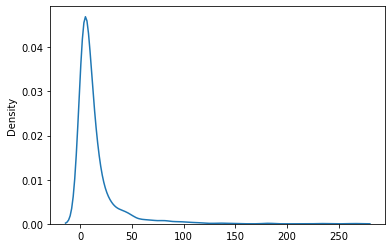

In [16]:
sns.kdeplot(train_list[0])

<AxesSubplot:ylabel='Density'>

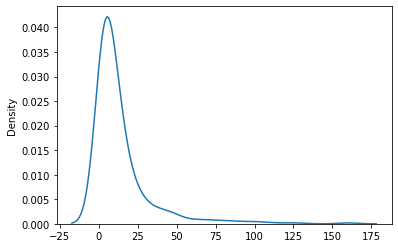

In [17]:
sns.kdeplot(test_list[0])